In [1]:
from pathlib import Path
import pandas as pd
from constrained_linear_regression import ConstrainedLinearRegression
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize_scalar
from Identification import *
from sklearn.datasets import load_boston

Choose a datasets: 
 1 -> AMOCO_HN 
 2 -> provaADM1 
 3 -> bsm2 
 4 -> matlab 
 5 -> thoni
Data are from: thoni_2
      S1in  S2in  Cin  Nin      XTin       Qin  gammaSin      xWin
time                                                              
1        0     0    0    0  0.997809  0.992650  0.981511  0.886041
2        0     0    0    0  0.995618  0.985300  0.962659  0.770382
3        0     0    0    0  0.995618  0.985300  0.962659  0.770382
4        0     0    0    0  0.995618  0.985300  0.962659  0.770382
5        0     0    0    0  0.995618  0.985300  0.962659  0.770382
6        0     0    0    0  0.996835  0.988975  0.972131  0.828427
7        0     0    0    0  0.996835  0.988975  0.972131  0.828427
8        0     0    0    0  1.000000  1.000000  1.000000  1.000000
9        0     0    0    0  1.000000  1.000735  1.001829  1.011304
10       0     0    0    0  1.000974  1.004410  1.010923  1.067575
11       0     0    0    0  1.000974  1.004410  1.010923  1.067575
12       0     

In [2]:
S1_in_0 = 1000
X71 = np.array(Dil*(S1_in_0-S1) + k_hyd*XT).reshape((-1,1))
X72 = np.array(q_M).reshape((-1,1))
X7r = np.hstack((X71,X72))
Y7r = np.array(q_C - Dil*(C_in_0 - C))

mdl71 = LinearRegression(fit_intercept=False, positive=True).fit(X7r,Y7r)
mdl72 = LinearRegression(fit_intercept=True, positive=True).fit(X7r,Y7r)
score71 = mdl71.score(X7r, Y7r)
score72 = mdl72.score(X7r, Y7r)

print(score71, score72)
print(mdl71.coef_, mdl72.coef_)

0.9965020863084937 0.9999923132070956
[0.         0.77024838] [0.         0.72817442]


THE MODEL DID NOT CONVERGE
CC_actual = [0.00426117 0.1010101 ]
DD_actual = [0.8181112  0.58035139]


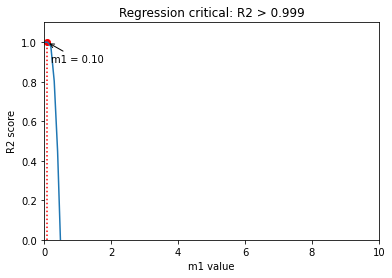

In [3]:
def obj_fun_regression(x, *args):
    X, y, min2 = args
    min_coef = [x, min2]
    model = ConstrainedLinearRegression(nonnegative=True)  
    model.fit(X, y, min_coef=min_coef)
    return model.score(X, y), model.coef_

xvett = np.linspace(0, 10, 100)
res = np.zeros_like(xvett)
CC = np.zeros_like(xvett)
DD = np.zeros_like(xvett)
for i in range(len(xvett)):
    x = xvett[i]
    res[i], coef = obj_fun_regression(x, (X7r)**0.5, (Y7r)**0.5, 0.45) 
    CC[i] = coef[0]
    DD[i] = coef[1]
    
plt.plot(xvett, res)
TARGET = 0.999
plt.scatter(max(xvett[res>TARGET]), TARGET, color='red')
plt.plot([max(xvett[res>TARGET]), max(xvett[res>TARGET])], [0, TARGET], ':', color='red')
plt.xlim([0, 10])
plt.ylim([0, 1.1])
plt.title("Regression critical: R2 > {}".format(TARGET))
plt.xlabel("m1 value")
plt.ylabel("R2 score")
plt.annotate("m1 = {:.2f}".format(max(xvett[res>TARGET])), (max(xvett[res>TARGET]), TARGET), (max(xvett[res>TARGET])+0.1, TARGET-0.1), arrowprops=dict(arrowstyle="->"))
CC_actual = CC[res>TARGET]
DD_actual = DD[res>TARGET]
print("CC_actual = {}".format(CC_actual))
print("DD_actual = {}".format(DD_actual))


In [4]:
def obj_fun_regression_2(x, *args):
    X, y, min2 = args
    min_coef = [0, 0]
    max_coef = [5.5, 5]
    model = ConstrainedLinearRegression(nonnegative=True)  
    model.fit(X, y, min_coef=min_coef)
    return -((model.coef_[0]**2 + model.coef_[1]**2)**0.5)

result = minimize_scalar(obj_fun_regression_2, args=(X7r, Y7r, 0), method='bounded', bounds=(0, 10))
print(result)

     fun: -0.7281744206948585
 message: 'Solution found.'
    nfev: 30
  status: 0
 success: True
       x: 9.9999947848782


In [5]:
model = ConstrainedLinearRegression(nonnegative=True)
min_coef = np.repeat(-np.inf, X7r.shape[1])
min_coef[0] = 1
min_coef[1] = 0
model.fit(X7r,Y7r, min_coef= min_coef)

print(model.intercept_)
print(model.coef_)
print(model.score(X7r,Y7r))


-51.083784170211366
[1. 0.]
-29.415384202021233


In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(X7r[:,0], Y7r, 'o')
plt.plot(X7r[:,0], model.predict(X7r))
plt.subplot(1,2,2)
plt.plot(X7r[:,1], Y7r, 'o')
plt.plot(X7r[:,1], model.predict(X7r))

Error in callback <function flush_figures at 0x000002B131CC1900> (for post_execute):


KeyboardInterrupt: 

<Figure size 720x720 with 0 Axes>

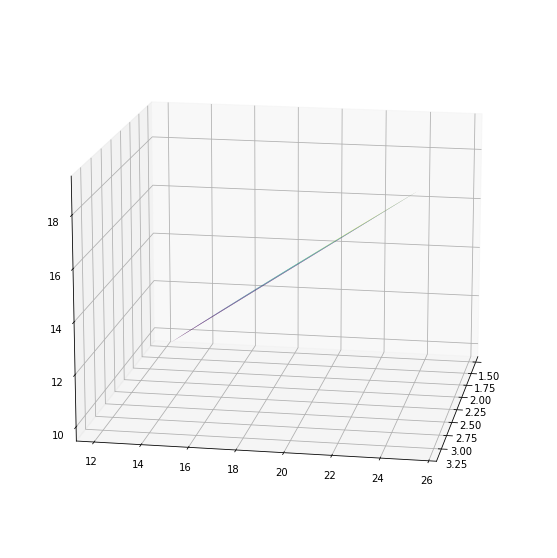

In [ ]:
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(10,10))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
ax.plot_trisurf(X7r[:,0], X7r[:,1], Y7r, cmap=plt.cm.viridis, linewidth=0.2)
ax.get_xlim3d()
ax.get_ylim3d()
ax.get_zlim3d()

ax.view_init(15,10)
